<a href="https://colab.research.google.com/github/abhishekmishra2612/Predicting-Stock-price/blob/master/GE_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd
df_ge = pd.read_csv("/content/drive/My Drive/ge.us.txt").drop(["OpenInt"],axis=1)

In [0]:
print("Shape of DataSet :",df_ge.shape)

Shape of DataSet : (14058, 6)


In [0]:
df_ge.head()

,Date,Open,High,Low,Close,Volume
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430


In [0]:
df_ge.tail()

,Date,Open,High,Low,Close,Volume
14053,2017-11-06,20.52,20.530,20.08,20.13,60641787
14054,2017-11-07,20.17,20.250,20.12,20.21,41622851
14055,2017-11-08,20.21,20.320,20.07,20.12,39672190
14056,2017-11-09,20.04,20.071,19.85,19.99,50831779
14057,2017-11-10,19.98,20.680,19.90,20.49,100698474


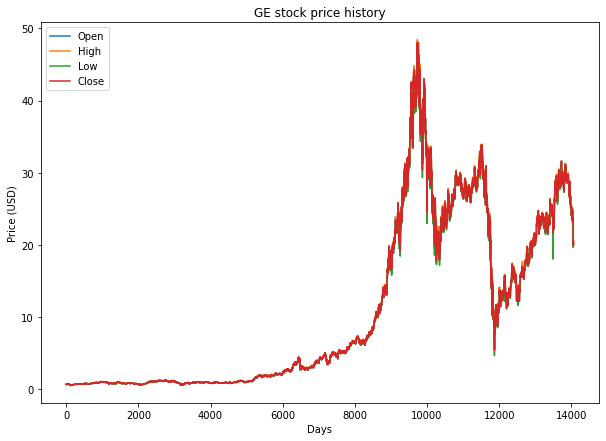

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

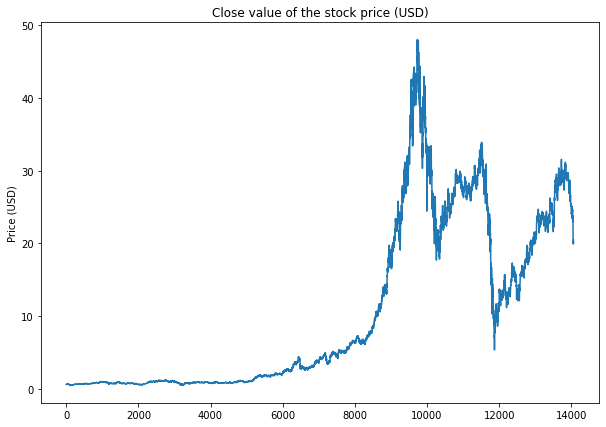

In [0]:
plt.figure(figsize=(10,7))
plt.plot(df_ge["Close"].values)
plt.title("Close value of the stock price (USD)")
plt.ylabel("Price (USD)")
plt.show()

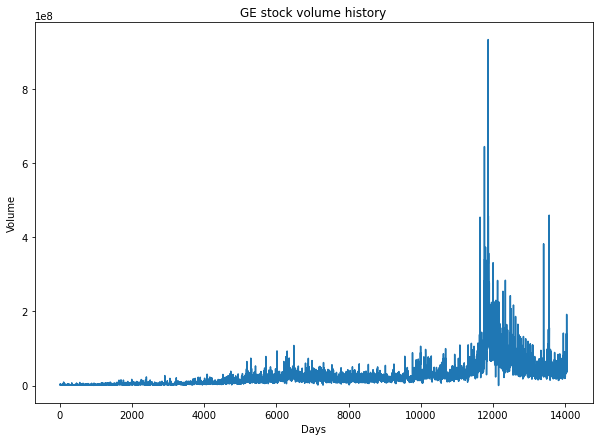

In [0]:
plt.figure(figsize=(10,7))
plt.plot(df_ge["Volume"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [0]:
print("checking if any null values are present\n", df_ge.isna().sum())

checking if any null values are present
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Open","High","Low","Close","Volume"]
df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

Train and Test size 11246 2812


In [0]:
import numpy as np

def build_timeseries(mat, y_col_index):
    TIME_STEPS = 3
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in range(dim_0):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [0]:
train_x, train_y = build_timeseries(x_train, 3)

test_x, test_y = build_timeseries(x_test, 3)

length of time-series i/o (11243, 3, 5) (11243,)
length of time-series i/o (2809, 3, 5) (2809,)


In [0]:
train_x = train_x[:11240,:]
train_y = train_y[:11240]
test_x = test_x[:2800,:]
test_y = test_y[:2800]

In [0]:
import tensorflow as tf

In [0]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(100, input_shape=(3,5), kernel_initializer='random_uniform'))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(20,activation='relu'))
lstm_model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

lstm_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

lstm_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100)               42400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 44,441
Trainable params: 44,441
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_history = lstm_model.fit(train_x, train_y,epochs=200, batch_size=40, verbose=1, validation_data=(test_x,test_y), shuffle=False)

Epoch 1/200
281/281 [==============================] - 1s 5ms/step - loss: 0.1746 - val_loss: 0.0745
Epoch 2/200
281/281 [==============================] - 1s 4ms/step - loss: 0.1034 - val_loss: 0.0609
Epoch 3/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0505 - val_loss: 0.0106
Epoch 4/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0196 - val_loss: 0.0053
Epoch 5/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 6/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0046
Epoch 7/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 8/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 9/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0020 - val_loss: 0.0065
Epoch 10/200
281/281 [==============================] - 1s 4ms/step - loss: 0.0019 - val_lo

In [0]:
lstm_model.save("/content/drive/My Drive/GE_Stock_Model.h5")

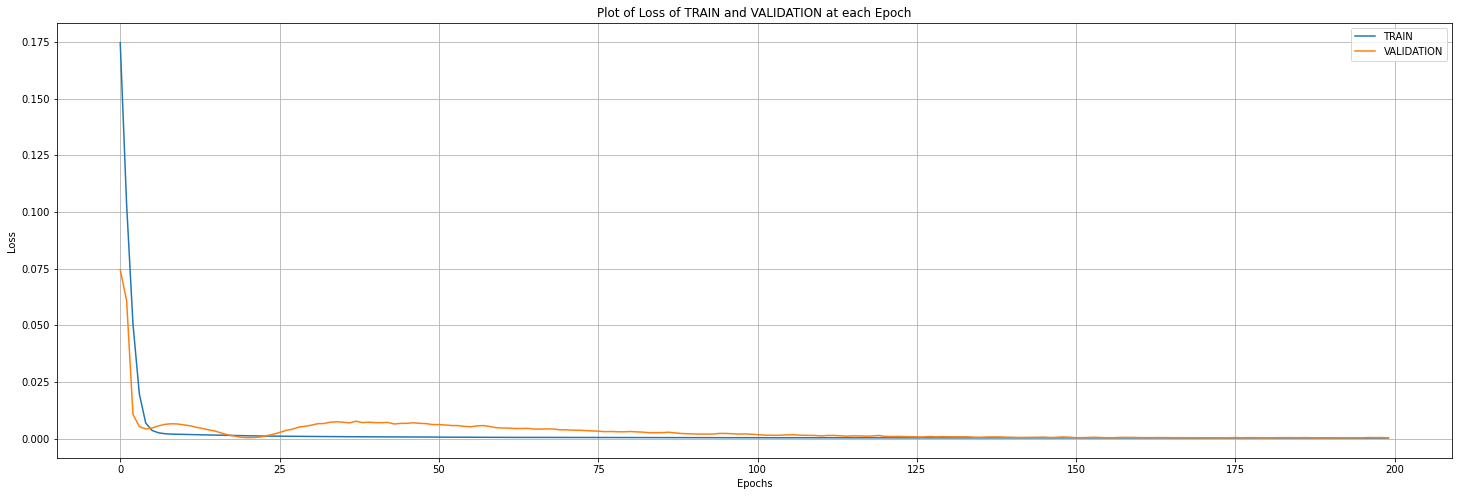

In [0]:
plt.figure(figsize=(25,8))
plt.plot(model_history.history["loss"],label="TRAIN")
plt.plot(model_history.history["val_loss"],label="VALIDATION")
plt.title("Plot of Loss of TRAIN and VALIDATION at each Epoch")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.grid()
plt.show()

In [0]:
pred_test=lstm_model.predict(test_x.reshape(test_x.shape[0],3,5))

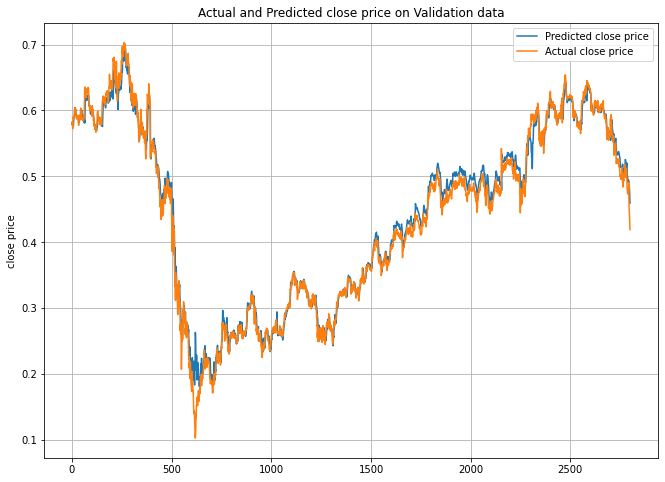

In [142]:
plt.figure(figsize=(11,8))
plt.plot(pred_test,label="Predicted close price")
plt.plot(test_y,label="Actual close price")
plt.title("Actual and Predicted close price on Validation data")
plt.ylabel("close price")
plt.legend()
plt.grid()
plt.show()

## Prediction on new unseen data.

In [0]:
new_test_data=pd.read_csv("/content/drive/My Drive/aaoi.us.txt").drop(["OpenInt"],axis=1)
new_test_data.head()

,Date,Open,High,Low,Close,Volume
0,2013-09-26,10.00,10.09,9.37,9.96,948900
1,2013-09-27,10.06,10.44,10.00,10.10,253329
2,2013-09-30,10.00,10.18,9.71,10.00,84800
3,2013-10-01,9.95,10.02,9.92,10.00,74500
4,2013-10-02,9.99,10.00,9.89,9.97,94000


In [0]:
new_test_data = min_max_scaler.transform(new_test_data.loc[:,train_cols])

In [0]:
new_test_x, new_test_y = build_timeseries(new_test_data,3)

length of time-series i/o (1038, 3, 5) (1038,)


In [0]:
new_test_pred = lstm_model.predict(new_test_x.reshape(new_test_x.shape[0],3,5))

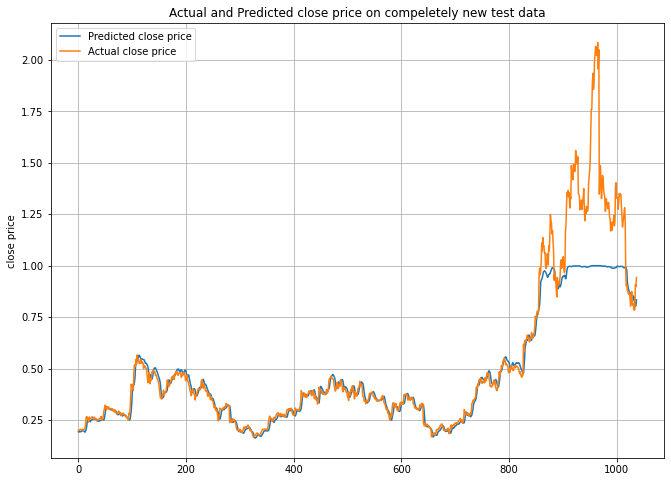

In [143]:
plt.figure(figsize=(11,8))
plt.plot(new_test_pred,label="Predicted close price")
plt.plot(new_test_y,label="Actual close price")
plt.title("Actual and Predicted close price on compeletely new test data")
plt.ylabel("close price")
plt.legend()
plt.grid()
plt.show()

In [141]:
for i in range(10):
  pred = lstm_model.predict(new_test_x[100+i].reshape(1,3,5))
  print("Predicted =",pred[0][0],"   Actual =",new_test_y[100+i])

Predicted = 0.38321763    Actual = 0.41055083746909987
Predicted = 0.41591343    Actual = 0.40613879283937754
Predicted = 0.42410627    Actual = 0.3937430484034911
Predicted = 0.4205964    Actual = 0.4874464724442601
Predicted = 0.43274564    Actual = 0.517910590125676
Predicted = 0.45457116    Actual = 0.5080360140496308
Predicted = 0.5086347    Actual = 0.5187509795789564
Predicted = 0.5194888    Actual = 0.5441727605406897
Predicted = 0.53121024    Actual = 0.521692342665438
Predicted = 0.53652036    Actual = 0.5664430810526214
